# Trying the Etude Scripts

In [1]:
import importlib
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import seaborn as sns
import grad_descent as gd

sns.set_theme(style="ticks")


In [2]:
importlib.reload(gd)


<module 'grad_descent' from 'c:\\Users\\Semyon\\Documents\\Python\\20_Projects\\ds_etudes\\grad_descent.py'>

## Loss Functions Symbolically

In [3]:
X = sp.IndexedBase("X")
y = sp.IndexedBase("y")
w = sp.IndexedBase("w")
J, l, b = sp.symbols('J lambda b')
i, j, n, m = sp.symbols('i j n m', integer=True)

In [4]:
# partial derivative of regularised (ridge) MSE with respect to w_1
J = (1/m) * sp.summation(((w * X[i] + b) - y[i])**2, (i,1,m))
J += (l/m) * sp.summation(w[j]**2, (j,1,10))
sp.diff(J, w[1])


2*lambda*w[1]/m + Sum(2*(b + X[i]*w - y[i])*Derivative(w, w[1])*X[i], (i, 1, m))/m

## Classification Model based on "circumferentially separated" Data

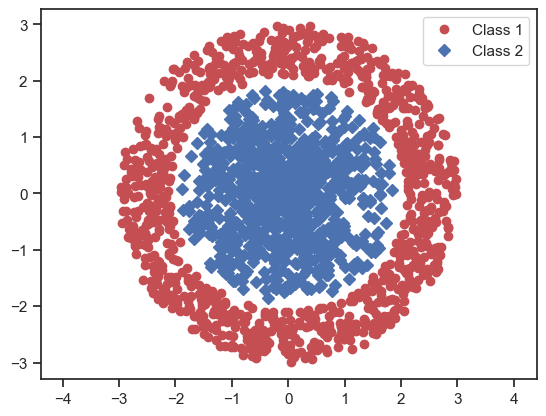

In [5]:
def circle(size, r1, r2):
    rad = np.random.uniform(r1, r2, size=size)
    t = np.random.uniform(0, 1, size=size)
    X = np.zeros((size, 2))
    X[:,0] = rad * np.cos(2*np.pi*t)
    X[:,1] = rad * np.sin(2*np.pi*t)
    return X

X0 = circle (1000, 0, 1.9)
X1 = circle (1000, 2.1, 3)
plt.plot(X1[:,0], X1[:,1], "ro", label="Class 1")
plt.plot(X0[:,0], X0[:,1], "bD", label="Class 2")
plt.axis("equal")
plt.legend()

In [6]:
X = np.vstack((X0, X1))
y = np.array([0]*1000 + [1]*1000)

In [7]:
# need to include w to stick to cost function definition
circ_border = lambda X, w, b: b**2 - (X**2).sum(axis=1)
gd.log_cost(X, y, None, 1, circ_border)  # w=np.array([1., 1]

3.1447469038541054

Text(0.5, 0, 'b')

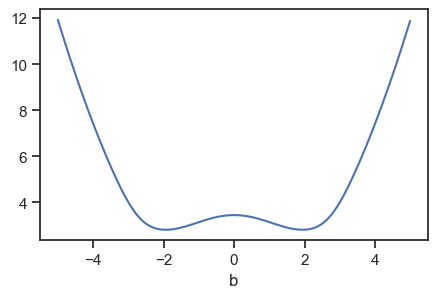

In [8]:
# check cost vs b relationship to see if gd will work
b_range = np.arange(-5.,5., .01)
plt.figure(figsize=(5,3))
plt.plot(
    b_range,
    [gd.log_cost(X, y, None, b, circ_border) for b in b_range]
    )
plt.xlabel("b")


In [9]:
w_, b_ = gd.log_train(
    X, y, np.array([1., 1]), 5, 1e-3, 50_000,
    report=5000, border_func=circ_border,
    )
cost_ = gd.log_cost(X,y, np.array([1., 1]), b_, border_func=circ_border)

epoch: 0, w: [1.00002368 0.99999629], b: 4.9995, cost: 11.9321
epoch: 5000, w: [1.12863916 0.96938905], b: 2.6536, cost: 3.2852
epoch: 10000, w: [1.34584374 0.83260945], b: 2.0592, cost: 2.8232
epoch: 15000, w: [1.57932528 0.69122695], b: 1.9631, cost: 2.8142
epoch: 20000, w: [1.8141001  0.54949852], b: 1.9437, cost: 2.8138
epoch: 25000, w: [2.04905697 0.40768993], b: 1.9397, cost: 2.8138
epoch: 30000, w: [2.28404824 0.26586425], b: 1.9388, cost: 2.8138
epoch: 35000, w: [2.51904656 0.12403498], b: 1.9386, cost: 2.8138
epoch: 40000, w: [ 2.75404636 -0.01779505], b: 1.9386, cost: 2.8138
epoch: 45000, w: [ 2.98904646 -0.15962524], b: 1.9386, cost: 2.8138


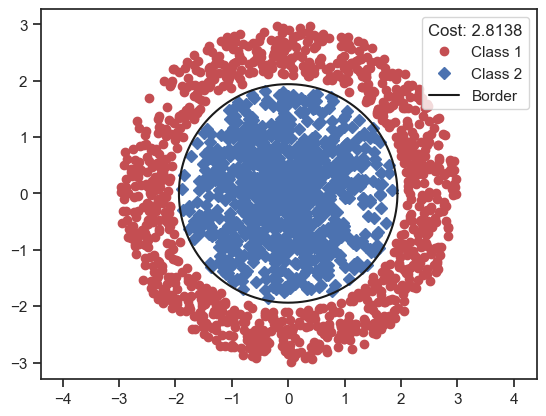

In [10]:
t = np.linspace(0, 2*np.pi, 1000)
x1_ = np.cos(t)
x2_ = np.sin(t)
plt.plot(X1[:,0], X1[:,1], "ro", label="Class 1")
plt.plot(X0[:,0], X0[:,1], "bD", label="Class 2")
plt.plot(b_*x1_, b_*x2_, "k-", label="Border")
plt.ylim(-2.5,2.5)
plt.axis("equal")
plt.legend(loc="upper right", title=f"Cost: {cost_:.4f}")

In [11]:
1 / (1 + np.exp(-circ_border(np.array([[1,0]]), None, b_)))

array([0.9403691])

## Multiple Linear Regression - Weight Vector, **$\vec{w}$**

In [12]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [13]:
gd.update_coef(X_train, y_train, w_init, b_init, 1e-3)

(array([  0.39133808,  18.75376742, -53.36032453, -26.42131611]),
 785.1811368010822)

In [14]:
X_train.repeat(20, 0).shape

(60, 4)

In [15]:
gd.train(
    X_train, y_train, np.array([0.,0,0,0]), 0., 5e-7, 1000,
    cost_func="rmse", regularize=True, C=1e4)

epoch: 0, w: [3.83436251e-04 8.87618240e-07 2.91812441e-07 9.58850134e-06], b: 0.0000, rmse: 314.1114
epoch: 100, w: [3.28782036e-02 7.61553246e-05 2.48631363e-05 8.21175241e-04], b: 0.0000, rmse: 264.3100
epoch: 200, w: [5.60442681e-02 1.29899886e-04 4.20837243e-05 1.39789460e-03], b: 0.0000, rmse: 228.9189
epoch: 300, w: [7.25200551e-02 1.68204175e-04 5.40482648e-05 1.80627296e-03], b: 0.0001, rmse: 203.8369
epoch: 400, w: [8.42041906e-02 1.95441512e-04 6.22779047e-05 2.09427021e-03], b: 0.0001, rmse: 186.1126
epoch: 500, w: [9.24648648e-02 2.14761083e-04 6.78769157e-05 2.29649846e-03], b: 0.0001, rmse: 173.6233
epoch: 600, w: [9.82877290e-02 2.28430984e-04 7.16429079e-05 2.43790564e-03], b: 0.0001, rmse: 164.8454
epoch: 700, w: [1.02381184e-01 2.38082050e-04 7.41465925e-05 2.53640609e-03], b: 0.0002, rmse: 158.6894
epoch: 800, w: [1.05252353e-01 2.44883232e-04 7.57913429e-05 2.60479141e-03], b: 0.0002, rmse: 154.3799
epoch: 900, w: [1.07262548e-01 2.49669124e-04 7.68584587e-05 2.652

(array([1.08656274e-01, 2.53005127e-04, 7.75361197e-05, 2.68456980e-03]),
 0.0002241504809646452)

## Univariate  Linear Regression - Scalar Weight, **$w$**

In [16]:
data = sns.load_dataset("penguins")

In [17]:
data["body_mass_kg"] = data["body_mass_g"] * 1e-3
data["flipper_length_cm"] = data["flipper_length_mm"] * 1e-2
data = data.iloc[:, -2:].dropna()

In [18]:
X = data.flipper_length_cm.values
y = data.body_mass_kg.values
w = b = 1
alpha = 1e-3

In [19]:
np.polyfit(X, y, 1)

array([ 4.96855664, -5.78083136])

In [20]:
gd.rmse(X, y, *np.polyfit(X, y, 1))

0.3931236269264684

In [21]:
gd.train(
    X, y, w, b, alpha, 10000,
    report=500, cost_func="rmse",
    regularize=True, C=10, power=4
    )

epoch: 0, w: 1.0007835882831095, b: 1.0004, rmse: 1.3720
epoch: 500, w: 1.2928893597747384, b: 1.1832, rmse: 0.7734
epoch: 1000, w: 1.3668968855124415, b: 1.2779, rmse: 0.6647
epoch: 1500, w: 1.3597810658839562, b: 1.3350, rmse: 0.6553
epoch: 2000, w: 1.3411794799738217, b: 1.3840, rmse: 0.6551
epoch: 2500, w: 1.322020808961907, b: 1.4295, rmse: 0.6559
epoch: 3000, w: 1.3036299673123537, b: 1.4726, rmse: 0.6569
epoch: 3500, w: 1.2861135200995588, b: 1.5133, rmse: 0.6579
epoch: 4000, w: 1.2694320623011894, b: 1.5520, rmse: 0.6589
epoch: 4500, w: 1.2535326209659239, b: 1.5887, rmse: 0.6600
epoch: 5000, w: 1.2383645864363957, b: 1.6236, rmse: 0.6610
epoch: 5500, w: 1.2238812965960082, b: 1.6569, rmse: 0.6621
epoch: 6000, w: 1.210039883391902, b: 1.6886, rmse: 0.6632
epoch: 6500, w: 1.1968009380641507, b: 1.7188, rmse: 0.6642
epoch: 7000, w: 1.1841281854692087, b: 1.7476, rmse: 0.6652
epoch: 7500, w: 1.1719881885109034, b: 1.7752, rmse: 0.6662
epoch: 8000, w: 1.160350082609328, b: 1.8016, 

(1.1182960576183891, 1.8964161649253384)

Contour plot for unregularized model.

In [22]:
vector_mse = np.vectorize(lambda w, b, X=X, y=y: gd.rmse(X, y, w, b,))
w_grid, b_grid = np.meshgrid(range(-40,41), range(-40,41))
mse_grid = vector_mse(w_grid, b_grid)
levels = np.logspace(1, 8, 8, base=2)

Text(0, 0.5, 'b')

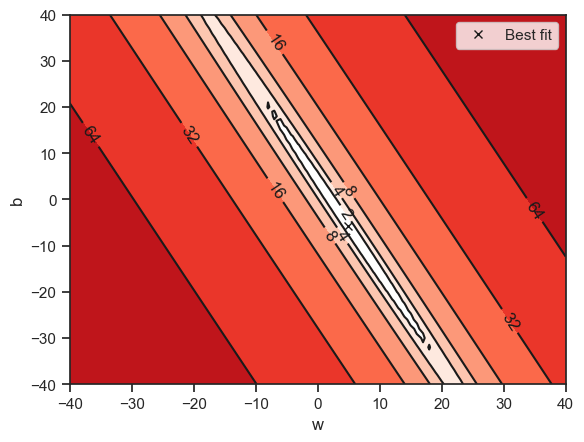

In [23]:
cs0 = plt.contourf(w_grid, b_grid, mse_grid,
    levels=levels, cmap="Reds", norm=LogNorm())
cs1 = plt.contour(cs0, colors="k", levels = cs0.levels)
cs1.clabel(colors="k")
plt.plot(*np.polyfit(X, y, 1), "kx", label="Best fit")
plt.legend()
plt.xlabel("w")
plt.ylabel("b")

Contour plot for oddly regularized regression.

In [24]:
vector_mse = np.vectorize(
    lambda w, b, X=X, y=y: gd.rmse(X, y, w, b, regularize=True, C=10, power=4)
    )
w_grid, b_grid = np.meshgrid(range(-40,41), range(-40,41))
mse_grid = vector_mse(w_grid, b_grid)
levels = np.logspace(1, 5, 5, base=10)

Text(0, 0.5, 'b')

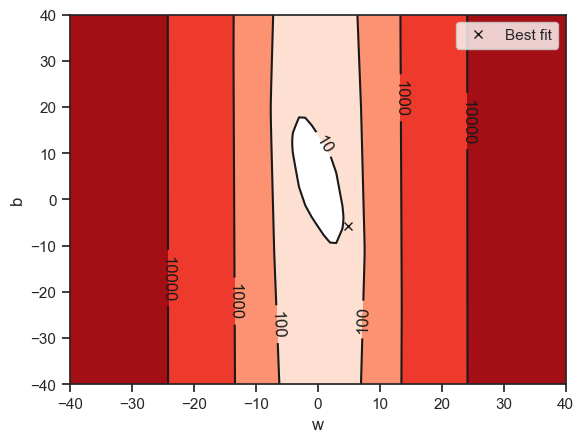

In [25]:
cs0 = plt.contourf(w_grid, b_grid, mse_grid,
    levels=levels, cmap="Reds", norm=LogNorm())
cs1 = plt.contour(cs0, colors="k", levels = cs0.levels)
cs1.clabel(colors="k")
plt.plot(*np.polyfit(X, y, 1), "kx", label="Best fit")
plt.legend()
plt.xlabel("w")
plt.ylabel("b")